In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE

In [2]:
heart_failure_data = pd.read_csv("data/heart_failure_clinical_records_dataset.csv")
heart_failure_data = heart_failure_data.drop('time', 1)
heart_failure_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


In [3]:
X = heart_failure_data.iloc[:, :-1]

In [4]:
y = heart_failure_data.iloc[:, -1]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [5]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
m = X_resampled.mean()
s = X_resampled.std()
X_std = (X_resampled - m)/s

In [6]:
X_resampled.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,62.735272,0.374384,552.874384,0.344828,36.527094,0.300493,258036.750051,1.503112,136.226601,0.598522,0.256158
std,12.146580,0.484561,921.796808,0.475898,11.450290,0.459038,94320.483541,1.059271,4.149417,0.490802,0.437048
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000
25%,53.746361,0.000000,124.250000,0.000000,28.250000,0.000000,205940.174749,1.000000,134.000000,0.000000,0.000000
50%,61.000000,0.000000,253.000000,0.000000,35.000000,0.000000,255000.000000,1.199190,136.000000,1.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,40.000000,1.000000,297750.000000,1.700000,139.000000,1.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000


In [7]:
y_resampled.value_counts()

0    203
1    203
Name: DEATH_EVENT, dtype: int64

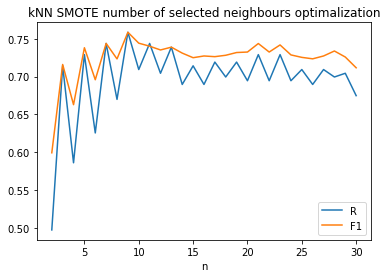

In [8]:
kNN_SMOTE_opt = pd.DataFrame()
for i in range(2,31):
    predicted = cross_val_predict(KNeighborsClassifier(n_neighbors=i), X_std, y_resampled, cv=10)
    res = pd.DataFrame({
#        "ACC":  metrics.accuracy_score(y_resampled, predicted),
#        "P":    metrics.precision_score(y_resampled, predicted),
        "R":    metrics.recall_score(y_resampled, predicted),
        "F1":   metrics.f1_score(y_resampled, predicted),
        }, index = [i])
    kNN_SMOTE_opt = pd.concat([res, kNN_SMOTE_opt])

kNN_SMOTE_opt.plot.line(x=None, y=None, xlabel = "n")
plt.title("kNN SMOTE number of selected neighbours optimalization")
plt.show()


In [10]:
predicted = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X_std, y_resampled, cv=10)
res = {
        "ACC":  metrics.accuracy_score(y_resampled, predicted),
        "P":    metrics.precision_score(y_resampled, predicted),
        "R":    metrics.recall_score(y_resampled, predicted),
        "F1":   metrics.f1_score(y_resampled, predicted),
        }

params = ["kNN SMOTE n=3"]
df_results = pd.DataFrame(res, index=params)
df_results

,ACC,P,R,F1
kNN SMOTE n=3,0.758621,0.758621,0.758621,0.758621


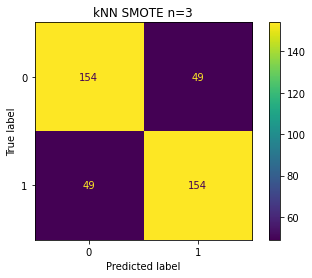

In [11]:
disp = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_resampled, predicted), display_labels=None)
disp.plot()
plt.title("kNN SMOTE n=3")
plt.show()

In [12]:
predicted = cross_val_predict(RandomForestClassifier(), X_std, y_resampled, cv=10)
res = pd.DataFrame({
        "ACC":  metrics.accuracy_score(y_resampled, predicted),
        "P":    metrics.precision_score(y_resampled, predicted),
        "R":    metrics.recall_score(y_resampled, predicted),
        "F1":   metrics.f1_score(y_resampled, predicted),
        }, index = ["Random Forest SMOTE"])
df_results = pd.concat([res, df_results])
df_results

,ACC,P,R,F1
Random Forest SMOTE,0.795567,0.806122,0.778325,0.791980
kNN SMOTE n=3,0.758621,0.758621,0.758621,0.758621


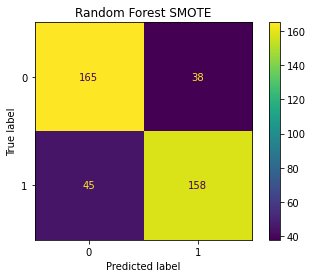

In [13]:
disp = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_resampled, predicted), display_labels=None)
disp.plot()
plt.title("Random Forest SMOTE")
plt.show()

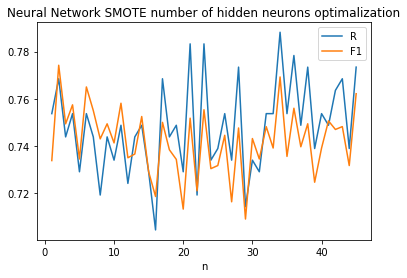

In [14]:
NNet_SMOTE_opt = pd.DataFrame()
for i in range(1,46):
    predicted = cross_val_predict(MLPClassifier(hidden_layer_sizes=(i,), max_iter = 4000), X_std, y_resampled, cv=10)
    res = pd.DataFrame({
#        "ACC":  metrics.accuracy_score(y_resampled, predicted),
#        "P":    metrics.precision_score(y_resampled, predicted),
        "R":    metrics.recall_score(y_resampled, predicted),
        "F1":   metrics.f1_score(y_resampled, predicted),
        }, index = [i])
    NNet_SMOTE_opt = pd.concat([res, NNet_SMOTE_opt])

NNet_SMOTE_opt.plot.line(x=None, y=None, xlabel = "n")
plt.title("Neural Network SMOTE number of hidden neurons optimalization")
plt.show()

In [17]:
predicted = cross_val_predict(MLPClassifier(hidden_layer_sizes=(34,), max_iter = 4000), X_std, y_resampled, cv=10)
res = pd.DataFrame({
        "ACC":  metrics.accuracy_score(y_resampled, predicted),
        "P":    metrics.precision_score(y_resampled, predicted),
        "R":    metrics.recall_score(y_resampled, predicted),
        "F1":   metrics.f1_score(y_resampled, predicted),
        }, index = ["NNet SMOTE hidden = 34"])
df_results = pd.concat([res, df_results])
df_results

,ACC,P,R,F1
NNet SMOTE hidden = 34,0.729064,0.714286,0.763547,0.738095
Random Forest SMOTE,0.795567,0.806122,0.778325,0.791980
kNN SMOTE n=3,0.758621,0.758621,0.758621,0.758621


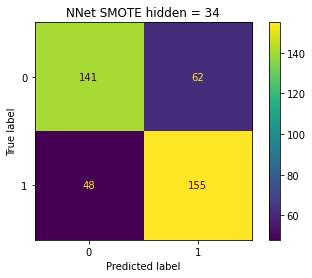

In [18]:
disp = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_resampled, predicted), display_labels=None)
disp.plot()
plt.title("NNet SMOTE hidden = 34")
plt.show()

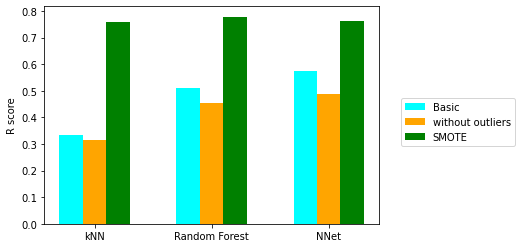

In [34]:
labels = ['kNN', 'Random Forest', 'NNet']
Basic_R = [0.333333, 0.510417, 0.572917]
without_outl_R = [0.313953, 0.453488, 0.488372]
SMOTE_R = [0.758621, 0.778325, 0.763547]


x = np.arange(len(labels))
width = 0.2 

plt.bar(x-0.2, Basic_R, width, color='cyan')
plt.bar(x, without_outl_R, width, color='orange')
plt.bar(x+0.2, SMOTE_R, width, color='green')
plt.xticks(x, ['kNN', 'Random Forest', 'NNet'])
plt.ylabel("R score")
plt.legend(["Basic", "without outliers", "SMOTE"], bbox_to_anchor = (1.05, 0.6))
plt.show()

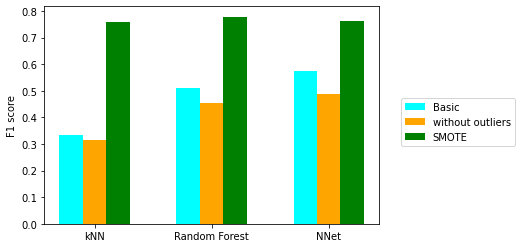

In [35]:
labels = ['kNN', 'Random Forest', 'NNet']
Basic_F1 = [0.418301, 0.569767, 0.555556]
without_outl_F1 = [0.402985, 0.523490, 0.512195]
SMOTE_F1 = [0.758621, 0.791980, 0.738095]


x = np.arange(len(labels))
width = 0.2 

plt.bar(x-0.2, Basic_R, width, color='cyan')
plt.bar(x, without_outl_R, width, color='orange')
plt.bar(x+0.2, SMOTE_R, width, color='green')
plt.xticks(x, ['kNN', 'Random Forest', 'NNet'])
plt.ylabel("F1 score")
plt.legend(["Basic", "without outliers", "SMOTE"], bbox_to_anchor = (1.05, 0.6))
plt.show()